In [3]:
# Dependencies
import requests
from pprint import pprint
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [4]:
# Import CSV as a Dataframe.
Basic_Data_Df = pd.read_csv("cleaned_perth_data.csv")
#Drop Dupplicate Values
Basic_Data_Df.drop_duplicates(subset=['ADDRESS'],inplace=True)

# Sort by Started to sort the values by the number of bathrooms
Basic_Data_Df

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30496,9B Teocote Crescent,Aubin Grove,423000,3,2,2.0,248,108,2011.0,24900,Cockburn Central Station,5700,05-2016\r,6164,-32.176013,115.858357,ATWELL COLLEGE,3.607062,129.0
30497,9B Viveash Road,Middle Swan,467000,4,2,2.0,400,132,2014.0,17100,Midland Station,2500,04-2015\r,6056,-31.872192,116.013543,LA SALLE COLLEGE,1.116806,53.0
30498,9b Wesley Street,South Fremantle,955000,3,2,1.0,200,127,1997.0,16000,Fremantle Station,1900,02-2019\r,6162,-32.066410,115.756070,FREMANTLE COLLEGE,1.134956,128.0
30499,9C Gold Street,South Fremantle,1040000,4,3,2.0,292,245,2013.0,16100,Fremantle Station,1500,03-2016\r,6162,-32.064580,115.751820,CHRISTIAN BROTHERS' COLLEGE,1.430350,49.0


In [5]:
#Address=Basic_Data_Df["ADDRESS"].value_counts()
#Address

In [6]:
#Print the stastical analysis 
Basic_Data_Df.describe()

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK
count,3.042900e+04,30429.000000,30429.000000,30429.000000,30429.000000,30429.000000,30429.000000,30429.000000,30429.000000,30429.000000,30429.000000,30429.000000,30429.000000,20633.000000
mean,6.380521e+05,3.658944,1.820960,2.035230,2668.136515,183.295902,1989.733905,19631.919123,4472.885964,6088.684939,-31.959883,115.878825,1.786140,72.374352
std,3.569409e+05,0.749315,0.589404,1.442084,17040.949977,71.922489,20.931055,11300.206083,4418.226732,61.029106,0.176474,0.117619,1.699288,40.653188
min,5.200000e+04,1.000000,1.000000,0.000000,61.000000,1.000000,1868.000000,681.000000,46.000000,6003.000000,-32.472979,115.583610,0.070912,1.000000
25%,4.090000e+05,3.000000,1.000000,2.000000,505.000000,130.000000,1978.000000,11100.000000,1800.000000,6050.000000,-32.066270,115.789422,0.874111,39.000000
50%,5.380000e+05,4.000000,2.000000,2.000000,683.000000,172.000000,1995.000000,17300.000000,3200.000000,6069.000000,-31.931727,115.853617,1.332751,68.000000
75%,7.650000e+05,4.000000,2.000000,2.000000,834.000000,223.000000,2005.000000,26300.000000,5300.000000,6149.000000,-31.843350,115.970000,2.070332,105.000000
max,2.440000e+06,10.000000,16.000000,99.000000,999999.000000,849.000000,2017.000000,59800.000000,35500.000000,6558.000000,-31.465818,116.341780,23.254372,139.000000


In [7]:
#Calculates and prints the minimum price of a house
MinHousingPrice=Basic_Data_Df['PRICE'].min()
print(f"${MinHousingPrice} is the minimum price of a house in the Perth Metropolitan area")
#Calculates and prints the maximum price of a house
MaxHousingPrice=Basic_Data_Df['PRICE'].max()
print(f"${MaxHousingPrice} is the maximum price of a house in the Perth Metropolitan area")
#Calculates and prints the minimum price of a house
AverageHousingPrice=Basic_Data_Df['PRICE'].mean()
print(f"${AverageHousingPrice} is the average price of a house in the Perth Metropolitan area")

$52000 is the minimum price of a house in the Perth Metropolitan area
$2440000 is the maximum price of a house in the Perth Metropolitan area
$638052.1093036248 is the average price of a house in the Perth Metropolitan area


In [8]:
#Grouped the data by the number of Bedrooms and then took an average of the remaining values.
Bedroom_Df = Basic_Data_Df.groupby(["BEDROOMS"]).mean()
Bedroom_Df

C:\Users\Adam Mayer\AppData\Local\Temp\ipykernel_16888\3986694465.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Bedroom_Df = Basic_Data_Df.groupby(["BEDROOMS"]).mean()


,PRICE,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK
BEDROOMS,,,,,,,,,,,,,
1,5.938351e+05,1.166667,1.282051,4651.512821,144.435897,1990.089744,15525.076923,3452.051282,6071.564103,-31.968474,115.864678,1.688233,54.612903
2,5.497109e+05,1.164634,1.326220,3208.375762,120.884909,1968.048018,14916.673780,3893.765244,6084.862805,-31.969325,115.891059,1.651443,61.354664
3,5.430944e+05,1.490077,1.807616,1839.338334,140.940746,1984.678378,17904.652740,3895.779318,6088.865540,-31.965671,115.882496,1.590154,71.871795
4,6.636378e+05,1.996798,2.151127,2706.455076,203.181453,1994.883406,21213.236768,4804.101463,6089.366547,-31.956382,115.875146,1.886849,75.019610
5,9.082959e+05,2.362383,2.593153,4557.904402,261.779013,1989.797688,19333.399289,4994.477101,6084.809693,-31.950717,115.876159,1.969339,64.369552
6,9.685407e+05,2.901141,2.752852,8443.889734,291.365019,1988.631179,19455.893536,5549.593156,6093.049430,-31.967079,115.906851,2.272969,68.675824
7,8.624979e+05,2.978723,3.234043,15508.170213,314.936170,1987.234043,22542.553191,6163.170213,6098.957447,-31.986505,115.926134,2.599249,74.807692
8,8.791765e+05,3.294118,4.352941,46271.529412,318.058824,1987.235294,23905.882353,8947.058824,6127.882353,-31.930773,115.934951,4.753568,90.615385
9,1.233333e+06,5.333333,3.000000,40201.000000,360.333333,1970.666667,20700.000000,13300.000000,6088.000000,-31.871174,115.983842,5.739960,75.333333


In [9]:
#Grouped the data by the number of Bathrooms and then took an average of the remaining values.
Bathroom_Df = Basic_Data_Df.groupby(["BATHROOMS"]).mean()
Bathroom_Df

C:\Users\Adam Mayer\AppData\Local\Temp\ipykernel_16888\4188652984.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Bathroom_Df = Basic_Data_Df.groupby(["BATHROOMS"]).mean()


,PRICE,BEDROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK
BATHROOMS,,,,,,,,,,,,,
1,4.944799e+05,3.024529,1.568385,2167.565287,128.874133,1974.434217,17873.761397,4036.255823,6091.601586,-31.977264,115.896098,1.585152,74.910724
2,6.407601e+05,3.817496,2.158586,2721.486843,193.412543,1995.736306,20709.502372,4671.168023,6088.593948,-31.954224,115.874495,1.858326,73.792233
3,1.093742e+06,4.432057,2.546890,3402.657416,277.523445,1990.896172,16306.742584,4176.220574,6079.239234,-31.949921,115.855671,1.811962,54.325294
4,1.282805e+06,4.927184,2.990291,8607.597087,347.800971,1993.208738,18111.014563,5128.097087,6080.533981,-31.932453,115.853545,2.323704,52.582822
5,1.239255e+06,5.653846,3.115385,11397.192308,366.000000,1998.538462,16426.923077,5531.500000,6073.538462,-31.935923,115.899919,2.305478,55.111111
6,1.454600e+06,6.400000,3.400000,1089.600000,382.400000,1981.600000,13080.000000,4840.000000,6114.400000,-32.016159,115.861456,1.723832,113.666667
7,6.855000e+05,5.000000,1.000000,841.500000,286.000000,1974.000000,18500.000000,10050.000000,6088.500000,-31.926910,116.052170,1.322462,57.000000
16,3.000000e+05,4.000000,1.000000,745.000000,95.000000,1977.000000,12000.000000,2500.000000,6054.000000,-31.878020,115.951170,1.519215,NaN


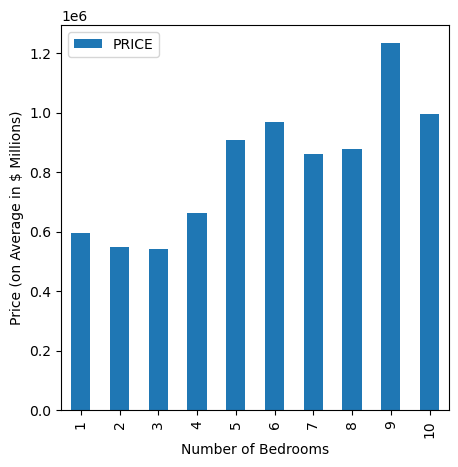

Looking at the graph there seems to a trend between the rising number of bedrooms and a rise in the properties price.
Despite the taper at the start, which could be explained by alot of one bedroom properties possibly being apartments located in the CBD
The jump from the number of bedrooms of 4 to 5 and 8 to 9 clearly indicates a preference for properties with a specfiic number of bedrooms
This could be partly due to families wanting bigger homes and using rooms that are classed as bedrooms for other things such as a computer room


<Figure size 640x480 with 0 Axes>

In [10]:
#Dropped all data other than price for the average number of Bedrooms.
PriceBedroom_Df=Bedroom_Df.drop(['GARAGE','BUILD_YEAR','POSTCODE','NEAREST_SCH_RANK', 'LATITUDE','LONGITUDE',
                                 'LAND_AREA','FLOOR_AREA', 'CBD_DIST','NEAREST_STN_DIST','NEAREST_SCH_DIST','BATHROOMS'], axis=1)
# Printed the dataframe to ensure it was what I was wanting.
PriceBedroom_Df

#Plotted the price of the house vs the number of Bedrooms 
PandaBedroom_chart = PriceBedroom_Df.plot(kind='bar', figsize=(5,5))
#Set the x axis label of the plot to Number of Bedrooms 
PandaBedroom_chart.set_xlabel("Number of Bedrooms")
#Set the y axis label of the plot to Price (on Average in $ Millions)
PandaBedroom_chart.set_ylabel("Price (on Average in $ Millions)")
#Displayed the plot above
plt.show() 
plt.tight_layout()
#Printed observations on the graph.
print("Looking at the graph there seems to a trend between the rising number of bedrooms and a rise in the properties price.")
print("Despite the taper at the start, which could be explained by alot of one bedroom properties possibly being apartments located in the CBD")
print("The jump from the number of bedrooms of 4 to 5 and 8 to 9 clearly indicates a preference for properties with a specfiic number of bedrooms")
print("This could be partly due to families wanting bigger homes and using rooms that are classed as bedrooms for other things such as a computer room")

In [11]:
# Changed the price of the 
PriceBedroom_Df['PRICE'] = PriceBedroom_Df['PRICE'].map('${:,.2f}'.format)

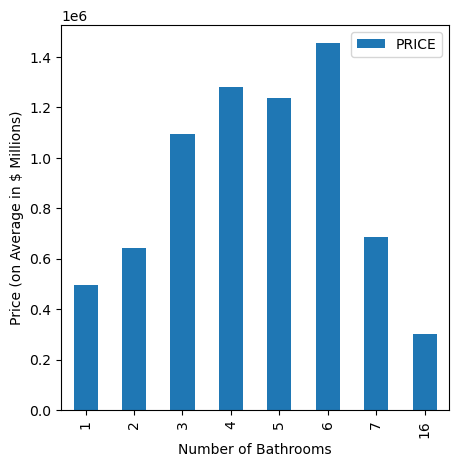

Looking at the graph there appears to be a  trend between an increase in the number of bathrooms a property has and the properties price.
Nevertheless once a property increases past 6 bathrooms its value dramatically decreases, on average. This could be because propterties with 7 or more
bathrooms are often share properties. Some of the other impacting factors upon the price of the property here could be that there is a correlation between the number of bathrooms and bedrooms.
The more bedrooms a property has the more likely it shall have an ensuite in more bedrooms, this could be a relating factor.


<Figure size 640x480 with 0 Axes>

In [12]:
#Dropped all data other than price for the average number of Bathrooms.
PriceBathroom_Df=Bathroom_Df.drop(['GARAGE','BUILD_YEAR','POSTCODE','NEAREST_SCH_RANK', 'LATITUDE','LONGITUDE',
                                 'LAND_AREA','FLOOR_AREA', 'CBD_DIST','NEAREST_STN_DIST','NEAREST_SCH_DIST','BEDROOMS'], axis=1)
# Printed the dataframe to ensure it was what I was wanting.
PriceBathroom_Df

#Plotted the price of the house vs the number of Bathrooms 
PandaBathroom_chart = PriceBathroom_Df.plot(kind='bar', figsize=(5,5))
#Set the x axis label of the plot to Number of Bathrooms 
PandaBathroom_chart.set_xlabel("Number of Bathrooms")
#Set the y axis label of the plot to Price (on Average in $ Millions)
PandaBathroom_chart.set_ylabel("Price (on Average in $ Millions)")

#Displayed the plot above
plt.show() 
plt.tight_layout()
#Printed observations on the graph.

print("Looking at the graph there appears to be a  trend between an increase in the number of bathrooms a property has and the properties price.")
print("Nevertheless once a property increases past 6 bathrooms its value dramatically decreases, on average. This could be because propterties with 7 or more")
print("bathrooms are often share properties. Some of the other impacting factors upon the price of the property here could be that there is a correlation between the number of bathrooms and bedrooms.")
print("The more bedrooms a property has the more likely it shall have an ensuite in more bedrooms, this could be a relating factor.")

In [13]:
# Grouped the original data by Suburb
groupedSUBURB_df = Basic_Data_Df.groupby(["SUBURB"]).mean(numeric_only=True)
groupedSUBURB_df
# print(grouped_SUBURB_df)


,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK
SUBURB,,,,,,,,,,,,,,
Alexander Heights,4.490973e+05,3.752212,1.831858,2.088496,625.787611,166.530973,1993.212389,13950.442478,7083.185841,6064.0,-31.827133,115.864632,1.915156,64.125000
Alfred Cove,8.493350e+05,3.560000,1.800000,1.920000,577.790000,186.260000,1988.640000,9751.550000,3867.360000,6154.0,-32.033900,115.815981,1.492035,48.310000
Alkimos,4.142292e+05,3.625000,1.968750,1.864583,10647.875000,177.593750,2013.395833,40803.125000,2593.322917,6038.0,-31.615747,115.687668,4.421420,39.000000
Anketell,1.005267e+06,4.133333,2.133333,2.666667,20896.400000,280.933333,1998.333333,29373.333333,3926.666667,6167.0,-32.215547,115.877233,5.623532,NaN
Applecross,1.396130e+06,3.712329,2.246575,2.342466,703.917808,226.753425,1988.342466,7106.849315,1772.904110,6153.0,-32.013490,115.838477,1.845389,38.301370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wooroloo,4.116774e+05,3.870968,1.645161,2.064516,24271.387097,157.548387,1975.935484,45861.290323,30941.935484,6558.0,-31.801048,116.311440,11.864059,105.000000
Wungong,6.704650e+05,4.500000,2.000000,1.944444,13261.222222,242.166667,1979.722222,29444.444444,3138.888889,6112.0,-32.181590,116.014520,2.274480,NaN
Yanchep,3.906562e+05,3.708333,1.895833,1.864583,583.000000,180.208333,2007.812500,50018.750000,11777.083333,6035.0,-31.544042,115.638093,1.578088,NaN


The correlation between Housing Price and Floor area by square metre (on Surburb average): 0.5375210632409387


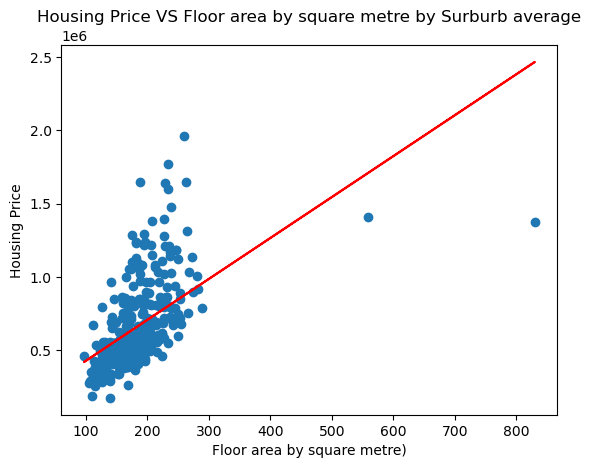

In [14]:
# Only returned selected columns of the grouped data
scatter_bath=groupedSUBURB_df["BATHROOMS"] 
scatter_price=groupedSUBURB_df["PRICE"]
scatter_floor=groupedSUBURB_df["FLOOR_AREA"] 
scatter_bed=groupedSUBURB_df["BEDROOMS"] 
scatter_land=groupedSUBURB_df["LAND_AREA"] 
#Set x and y axis labels in plot. 
plt.ylabel("Housing Price")
plt.xlabel("Floor area by square metre)")
#Plot the scatter plot with a line of regression.
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(scatter_floor, scatter_price)
regress_values = scatter_floor * slope + intercept
plt.plot(scatter_floor,regress_values,"r-")
line_eq = "y = " + str((slope)) + "x + " + str((intercept))
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
print(f"The correlation between Housing Price and Floor area by square metre (on Surburb average): {rvalue}")
plt.scatter(scatter_floor,scatter_price) 
#Set the title of the scatter plot
plt.title("Housing Price VS Floor area by square metre by Surburb average")
#Display the scatter plot
plt.show()

The correlation between Housing Price and Floor area by square metre : 0.554330452862782


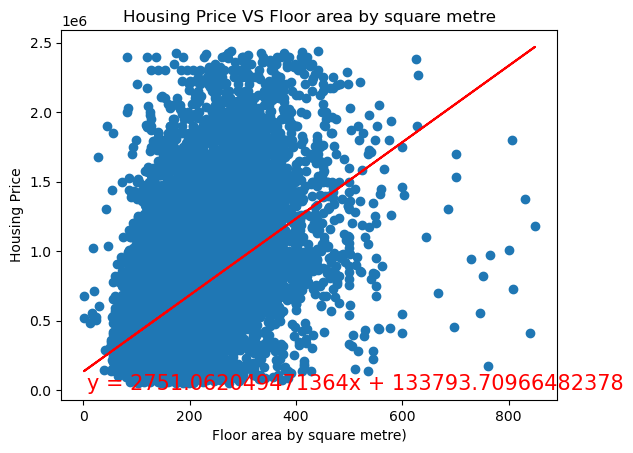

In [15]:
# Only returned selected columns of the original data
scatter_basicland=Basic_Data_Df["LAND_AREA"] 
scatter_basicprice=Basic_Data_Df["PRICE"]
scatter_basicfloor=Basic_Data_Df["FLOOR_AREA"] 
scatter_basicbath=Basic_Data_Df["BATHROOMS"] 
scatter_basicbed=Basic_Data_Df["BEDROOMS"] 

#Set x and y axis labels in plot. 
plt.ylabel("Housing Price")
plt.xlabel("Floor area by square metre)")

#Plot the scatter plot with a line of regression.
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(scatter_basicfloor, scatter_basicprice)
regress_values = scatter_basicfloor * slope + intercept
plt.plot(scatter_basicfloor,regress_values,"r-")
line_eq = "y = " + str((slope)) + "x + " + str((intercept))
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
print(f"The correlation between Housing Price and Floor area by square metre : {rvalue}")
plt.scatter(scatter_basicfloor,scatter_basicprice) 

#Set the title of the scatter plot
plt.title("Housing Price VS Floor area by square metre")

#Display the scatter plot
plt.show()

The correlation between Housing Price and Land area by square metre (on Surburb average): 0.012173524003896076


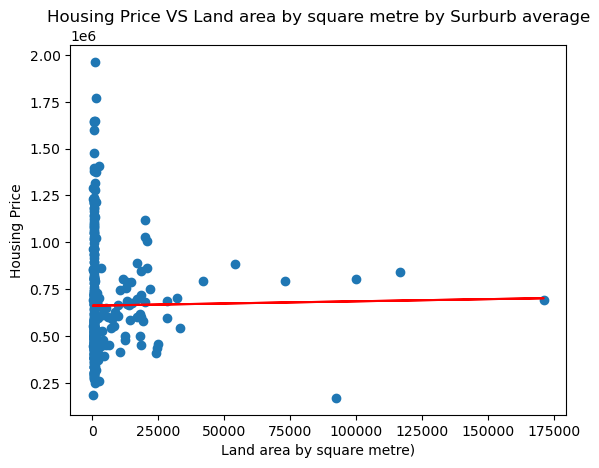

In [16]:
#Set x and y axis labels in plot.
plt.ylabel("Housing Price")
plt.xlabel("Land area by square metre)")

#Plot the scatter plot with a line of regression.
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(scatter_land, scatter_price)
regress_values = scatter_land * slope + intercept
plt.plot(scatter_land,regress_values,"r-")
line_eq = "y = " + str((slope)) + "x + " + str((intercept))
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
print(f"The correlation between Housing Price and Land area by square metre (on Surburb average): {rvalue}")
plt.scatter(scatter_land,scatter_price) 

#Set the title of the scatter plot
plt.title("Housing Price VS Land area by square metre by Surburb average")

#Display the scatter plot
plt.show()

The correlation between Housing Price and Land area by square metre: 0.05460998831843031


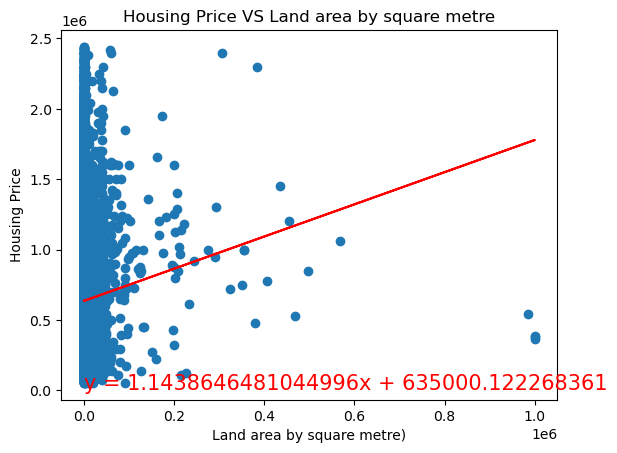

In [17]:
#Set x and y axis labels in plot.
plt.ylabel("Housing Price")
plt.xlabel("Land area by square metre)")

#Plot the scatter plot with a line of regression.
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(scatter_basicland, scatter_basicprice)
regress_values = scatter_basicland * slope + intercept
plt.plot(scatter_basicland,regress_values,"r-")
line_eq = "y = " + str((slope)) + "x + " + str((intercept))
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
print(f"The correlation between Housing Price and Land area by square metre: {rvalue}")
plt.scatter(scatter_basicland,scatter_basicprice) 

#Set the title of the scatter plot
plt.title("Housing Price VS Land area by square metre")

#Display the scatter plot
plt.show()

The correlation between Housing Price and the number of bathrooms (on Surburb average): 0.4221704110486506


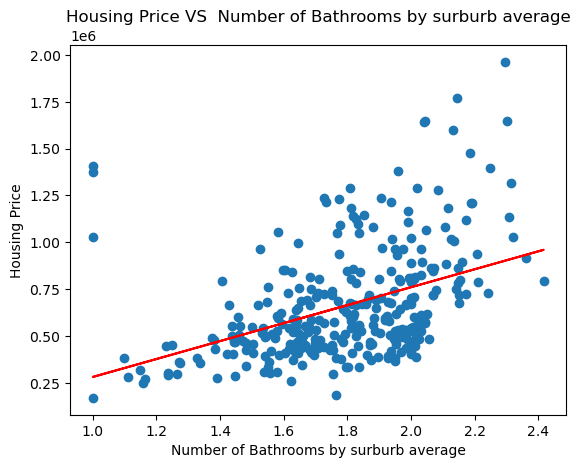

In [18]:
#Set x and y axis labels in plot.
plt.ylabel("Housing Price")
plt.xlabel("Number of Bathrooms by surburb average")
plt.scatter(scatter_bath,scatter_price)

#Plot the scatter plot with a line of regression.
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(scatter_bath, scatter_price)
regress_values = scatter_bath * slope + intercept
plt.plot(scatter_bath,regress_values,"r-")
line_eq = "y = " + str((slope)) + "x + " + str((intercept))
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
print(f"The correlation between Housing Price and the number of bathrooms (on Surburb average): {rvalue}")

#Set the title of the scatter plot
plt.title("Housing Price VS  Number of Bathrooms by surburb average")

#Display the scatter plot
plt.show()

The correlation between Housing Price and the number of bathrooms : 0.38052106503815164


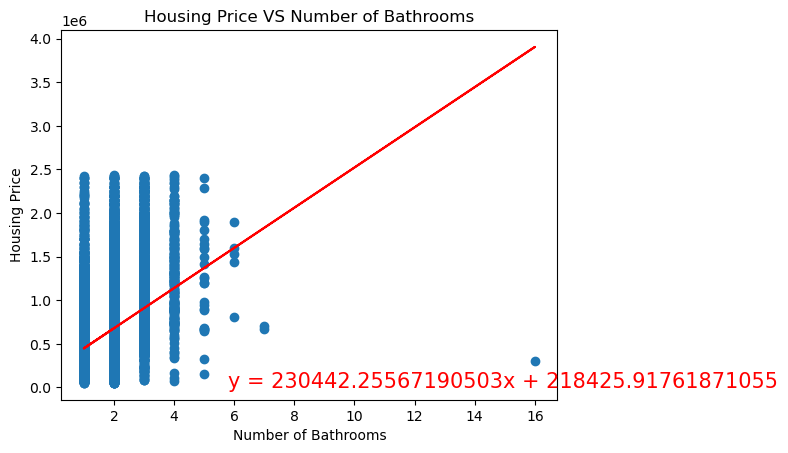

In [19]:
#Set x and y axis labels in plot.
plt.ylabel("Housing Price")
plt.xlabel("Number of Bathrooms")

#Plot the scatter plot with a line of regression.
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(scatter_basicbath, scatter_basicprice)
regress_values = scatter_basicbath * slope + intercept
plt.plot(scatter_basicbath,regress_values,"r-")
line_eq = "y = " + str((slope)) + "x + " + str((intercept))
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
print(f"The correlation between Housing Price and the number of bathrooms : {rvalue}")
plt.scatter(scatter_basicbath,scatter_basicprice) 

#Set the title of the scatter plot
plt.title("Housing Price VS Number of Bathrooms")

#Display the scatter plot
plt.show()

The correlation between Housing Price and the number of bedrooms  (on Surburb average): 0.09627290049999984


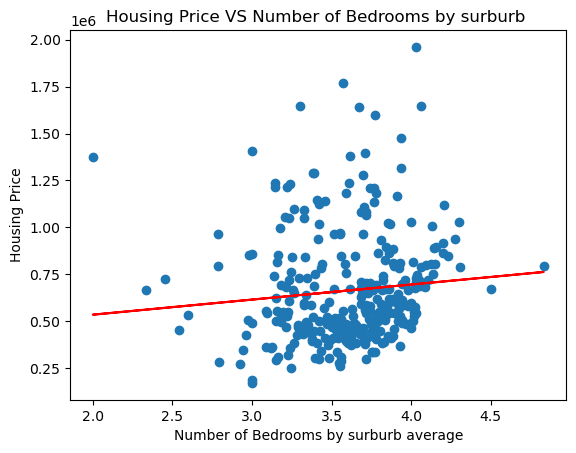

In [20]:
#Set x and y axis labels in plot.
plt.ylabel("Housing Price")
plt.xlabel("Number of Bedrooms by surburb average")

#Plot the scatter plot with a line of regression.
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(scatter_bed, scatter_price)
regress_values = scatter_bed * slope + intercept
plt.plot(scatter_bed,regress_values,"r-")
line_eq = "y = " + str((slope)) + "x + " + str((intercept))
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
print(f"The correlation between Housing Price and the number of bedrooms  (on Surburb average): {rvalue}")
plt.scatter(scatter_bed,scatter_price) 

#Set the title of the scatter plot
plt.title("Housing Price VS Number of Bedrooms by surburb ")

#Display the scatter plot
plt.show()

The correlation between Housing Price and the number of bedrooms is: 0.256201560246872


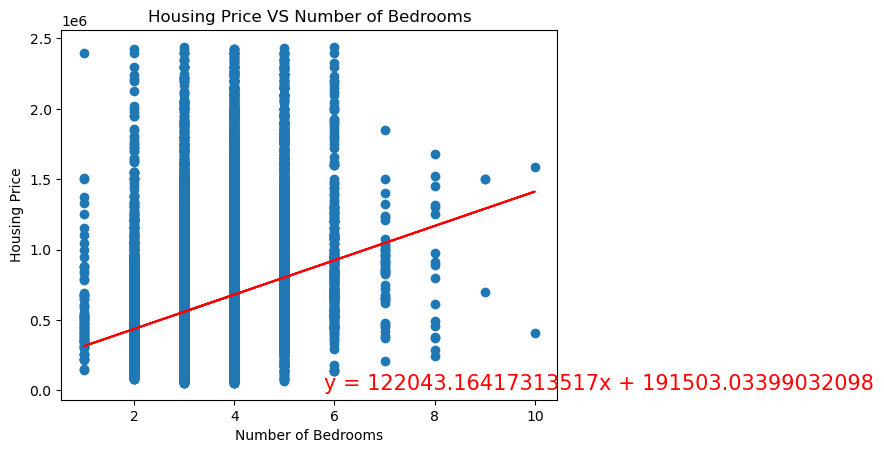

In [21]:
#Set x and y axis labels in plot.
plt.ylabel("Housing Price")
plt.xlabel("Number of Bedrooms")
plt.scatter(scatter_basicbed,scatter_basicprice) 

#Plot the scatter plot with a line of regression.
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(scatter_basicbed, scatter_basicprice)
regress_values = scatter_basicbed * slope + intercept
plt.plot(scatter_basicbed,regress_values,"r-")
line_eq = "y = " + str((slope)) + "x + " + str((intercept))
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
print(f"The correlation between Housing Price and the number of bedrooms is: {rvalue}")

#Set the title of the scatter plot
plt.title("Housing Price VS Number of Bedrooms")

#Display the scatter plot
plt.show()

In [22]:
#Dropped all other columns in the grouped data other than price
AllpriceDF=groupedSUBURB_df.drop(['GARAGE','BUILD_YEAR','POSTCODE','NEAREST_SCH_RANK', 'LATITUDE','LONGITUDE',
                                 'LAND_AREA','FLOOR_AREA', 'CBD_DIST','NEAREST_STN_DIST','NEAREST_SCH_DIST','BEDROOMS','BATHROOMS'], axis=1)
#Only presented the column of average price by surbub
AllpriceDF


,PRICE
SUBURB,
Alexander Heights,4.490973e+05
Alfred Cove,8.493350e+05
Alkimos,4.142292e+05
Anketell,1.005267e+06
Applecross,1.396130e+06
...,...
Wooroloo,4.116774e+05
Wungong,6.704650e+05
Yanchep,3.906562e+05


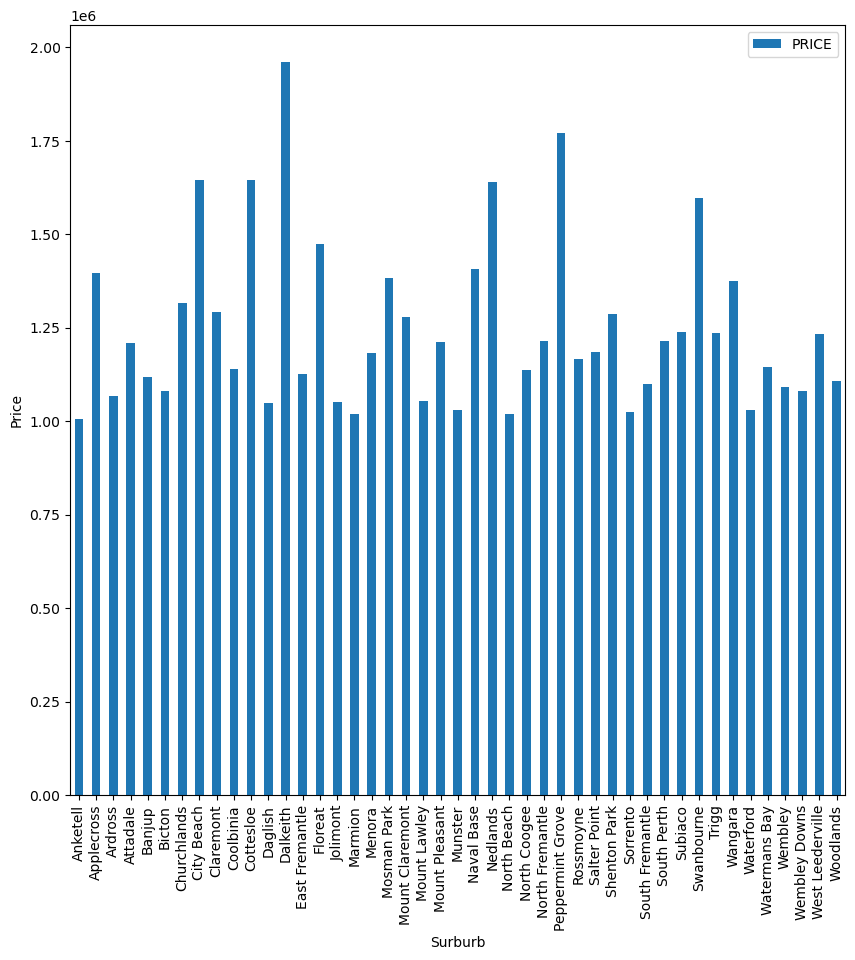

<Figure size 640x480 with 0 Axes>

In [23]:
#Presented the most expensive suburbs by average price of house as a bar graph and displays the average price
tophalf=AllpriceDF.loc[AllpriceDF["PRICE"] >= 1000000]
tophalf
PandaBar_chart = tophalf.plot(kind='bar', figsize=(10,10))
PandaBar_chart.set_xlabel("Surburb")
PandaBar_chart.set_ylabel("Price")
plt.show()
plt.tight_layout()

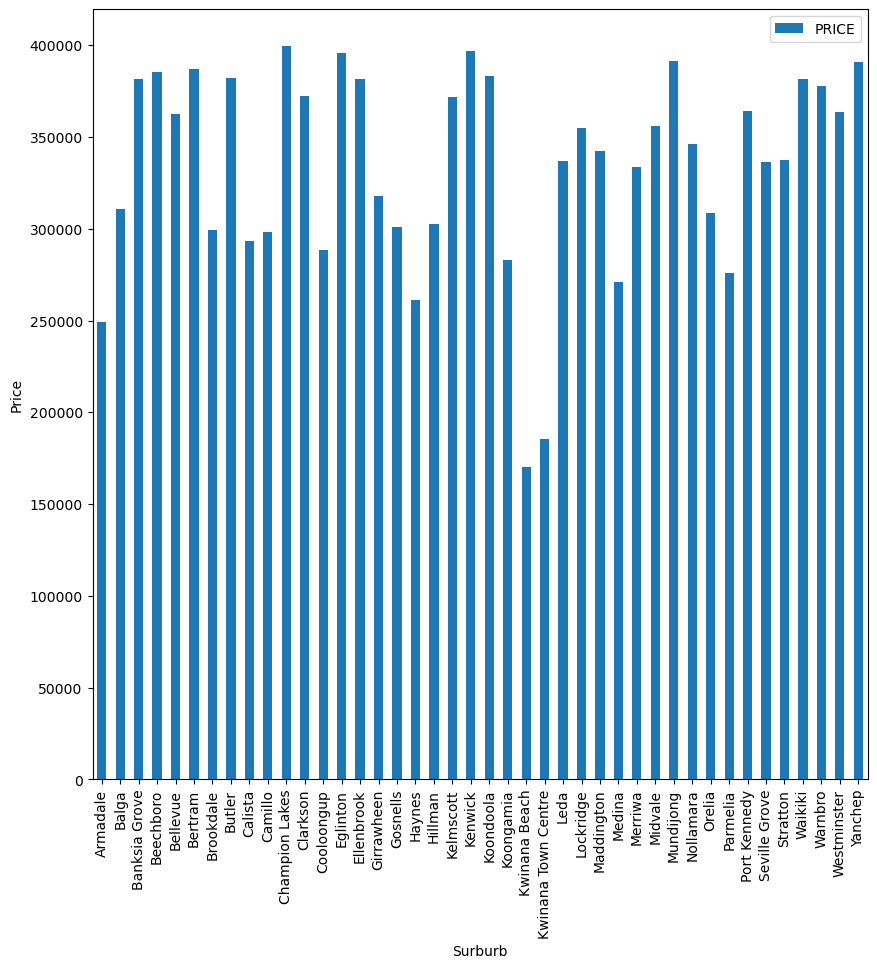

<Figure size 640x480 with 0 Axes>

In [24]:
#Presented the least expensive suburbs by average price of house as a bar graph and displays the average price
bottomhalf=AllpriceDF.loc[AllpriceDF["PRICE"] <= 400000]
bottomhalf
PandaBar_chart = bottomhalf.plot(kind='bar', figsize=(10,10))
PandaBar_chart.set_xlabel("Surburb")
PandaBar_chart.set_ylabel("Price")
plt.show()
plt.tight_layout()